In [1]:
import ROOT as r

Welcome to JupyROOT 6.08/02


In [2]:
#r.gSystem.Load("RooDCB.C")
r.gROOT.ProcessLine(".L RooDCB.C")

0L


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [3]:
import cPickle
import numpy as np
import pandas as pd

In [4]:
FIT_LOW, FIT_HIGH = 105e3, 160e3
#FIT_LOW, FIT_HIGH = 120e3, 130e3

CAT = 2

In [5]:
def draw():
    r.gROOT.FindObject('c1').Draw()

def logy(dolog=True):
    r.gROOT.FindObject('c1').SetLogy(dolog)

In [6]:
myy = r.RooRealVar("myy","myy",105e3,160e3)

# Load in m_yy histograms from Xhh_m350_yybb (h014)

In [7]:
f = r.TFile("histos_SM.root")
keys = [k.GetName() for k in f.GetListOfKeys()]
histos_all = [{},{},{}]
datasets_all = [{},{},{}]
for k0 in keys:
    if not k0.startswith('h_'): continue
    k = k0[len('h_'):]
    cat = int(k.split('_')[-1])
    v = '_'.join(k.split('_')[:-1])
    h = f.Get(k0)
    histos_all[cat][v] = h
    
    ds = r.RooDataHist('d_'+k,'d_'+k,r.RooArgList(myy),h)
    datasets_all[cat][v] = ds

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(d_nominal_0): fit range of variable myy expanded to nearest bin boundaries: [105000,160000] --> [105000,160000]
[#1] INFO:DataHandling -- RooDataHist::adjustBinning(d_nominal_1): fit range of variable myy expanded to nearest bin boundaries: [105000,160000] --> [105000,160000]
[#1] INFO:DataHandling -- RooDataHist::adjustBinning(d_nominal_2): fit range of variable myy expanded to nearest bin boundaries: [105000,160000] --> [105000,160000]
[#1] INFO:DataHandling -- RooDataHist::adjustBinning(d_EG_RESOLUTION_ALL__1down_0): fit range of variable myy expanded to nearest bin boundaries: [105000,160000] --> [105000,160000]
[#1] INFO:DataHandling -- RooDataHist::adjustBinning(d_EG_RESOLUTION_ALL__1down_1): fit range of variable myy expanded to nearest bin boundaries: [105000,160000] --> [105000,160000]
[#1] INFO:DataHandling -- RooDataHist::adjustBinning(d_EG_RESOLUTION_ALL__1down_2): fit range of variable myy expanded to nearest bin boundar

In [24]:
m0 = r.RooRealVar("m0","m0",120e3,130e3)
sigma0 = r.RooRealVar("sigma0","sigma0",0,5e3)
alphaHi = r.RooRealVar("alphaHi","alphaHi",1.886)#0,20)
nHi = r.RooRealVar("nHi","nHi",2.42)#0,20)
alphaLo = r.RooRealVar("alphaLo","alphaLo",1.591)#0,20)
nLo = r.RooRealVar("nLo","nLo",4.23)#0,20)

dcb = r.RooDCB("dcb","dcb",myy,m0,sigma0,alphaHi,nHi,alphaLo,nLo)

In [25]:
r.RooMsgService.instance().setGlobalKillBelow(r.RooFit.FATAL)

In [26]:
ds = datasets_all[2]['nominal']
fit_result = dcb.fitTo(ds,r.RooFit.Verbose(False),r.RooFit.Extended(True),r.RooFit.Save())

 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 m0           1.25000e+05  1.00000e+03    1.20000e+05  1.30000e+05
     2 sigma0       2.50000e+03  5.00000e+02    0.00000e+00  5.00000e+03
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        1000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=1114.22 FROM MIGRAD    STATUS=INITIATE        8 CALLS           9 TOTAL
                     EDM= unknown      STRATEGY= 1      NO ERROR MATRIX       
  EXT PARAMETER               CURRENT GUESS       STEP         FIRST   
  NO

In [27]:
fit_result.Print()


  RooFitResult: minimized FCN value: 1096.14, estimated distance to minimum: 6.85995e-06
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
                    m0    1.2496e+05 +/-  1.45e+02
                sigma0    1.4574e+03 +/-  1.17e+02



In [28]:
fit_result.status()

0

In [15]:
r.TVirtualFitter.GetMaxIterations()

0

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


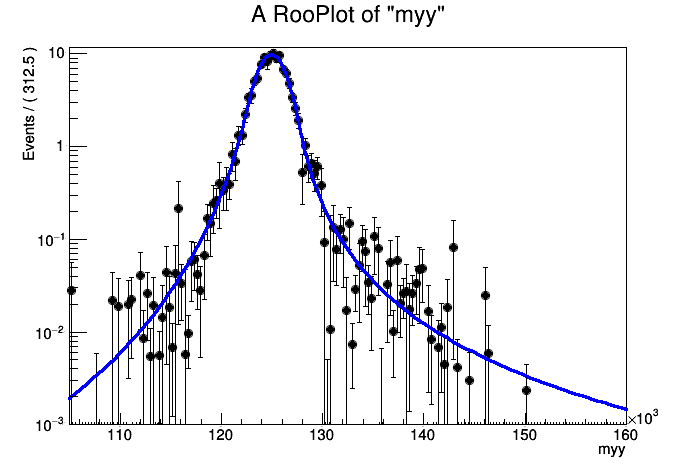

In [11]:
frame = myy.frame()
ds.plotOn(frame)
dcb.plotOn(frame)
frame.SetMinimum(1e-3)
frame.Draw()
logy(True)
draw()

In [12]:
histos = histos_all[CAT]
all_variations = sorted(histos.keys())
up_variations = [v for v in all_variations if v.lower().endswith('up') and not 'JER' in v]
down_variations = [v for v in all_variations if v.lower().endswith('down')]
other_variations = list(set(all_variations).difference(up_variations+down_variations))

print("{} variations: {} up / {} down / {} other".format(len(all_variations), len(up_variations), len(down_variations), len(other_variations)))

113 variations: 54 up / 54 down / 5 other


In [13]:
ds_nom = datasets_all[CAT]['nominal']
dcb.fitTo(ds_nom)
m0_nom = m0.getVal()
sigma0_nom = sigma0.getVal()
integral_nom = histos_all[CAT]['nominal'].Integral()

 **********
 **   10 **SET PRINT           1
 **********
 **********
 **   11 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 alphaHi      1.88631e+00  4.19432e-01    0.00000e+00  2.00000e+01
     2 alphaLo      1.59047e+00  4.52151e-01    0.00000e+00  2.00000e+01
     3 m0           1.24956e+05  1.51450e+02    1.20000e+05  1.30000e+05
     4 nHi          2.41841e+00  1.53160e+00    0.00000e+00  2.00000e+01
     5 nLo          4.24425e+00  3.87635e+00    0.00000e+00  2.00000e+01
     6 sigma0       1.45734e+03  1.33456e+02    0.00000e+00  5.00000e+03
 **********
 **   12 **SET ERR         0.5
 **********
 **********
 **   13 **SET PRINT           1
 **********
 **********
 **   14 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **   15 **MIGRAD        3000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINI

In [14]:
fit_params = []
fits_up = []
hists_up = []
fits_down = []
hists_down = []
up_bases = []
down_bases = []
for v in sorted(datasets_all[CAT].keys()):
    break
    if v == 'nominal': continue
    
    ds = datasets_all[CAT][v]
    #h.Fit(f_dg, 'Q', '', FIT_LOW, FIT_HIGH)
    dcb.fitTo(ds)
    
    integral = histos_all[CAT][v].Integral()
    
    sign = 0
    if v in up_variations:
        sign = 1
    if v in down_variations:
        sign = -1
        
    #result = (m0,c1,sigma1,c2,sigma2,sign,v)
    #result = (m0.getVal(),c1,sigma1,c2,sigma2,integral,sign,v)
    result = (m0.getVal(),sigma0.getVal(),integral,sign,v)
    fit_params.append(result)
    
    if v == 'nominal':
        nominal_fit = np.array(result)
        continue
    
    if v in up_variations:
        fits_up.append(result)
        hists_up.append(h)
        up_bases.append(v.split('__')[0])
    if v in down_variations:
        fits_down.append(result)
        hists_down.append(h)
        down_bases.append(v.split('__')[0])

cols = ['m0','sigma0','integral','sign','variation']
fit_params = pd.DataFrame(fit_params, columns=cols)

In [ ]:
# calculate fractional errors w.r.t nominal
fit_params = fit_params.assign(dm0=lambda x: 100.*(x.m0-m0_nom)/m0_nom,
                               dsigma1=lambda x: 100.*(x.sigma0-sigma0_nom)/sigma0_nom,
                               dnorm=lambda x: 100.*(x.integral-integral_nom)/integral_nom)

In [ ]:
# flag variations w/ more than 0.1% effect
fit_params = fit_params.assign(m0_flag=lambda x: np.abs(x.dm0)>0.1,
                               sigma1_flag=lambda x: np.abs(x.dsigma1)>0.1,
                               norm_flag=lambda x: np.abs(x.dnorm)>0.1)

# dominant systematics on signal width (%)

In [ ]:
fit_params[fit_params.sigma1_flag][['variation','dsigma1']]

# dominant systematics on signal mean (%)

In [ ]:
fit_params[fit_params.m0_flag][['variation','dm0']]

# dominant systematics on normalization (%)

In [ ]:
fit_params[fit_params.norm_flag][['variation','dnorm']]

In [ ]:
fit_params[['variation','dnorm']]